In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_Dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
# check how many rows and columns
df.shape

(374, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
# check missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
# fill nan with 'No disorder'
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No disorder")

## What is the relationship between stress level and quality of sleep?

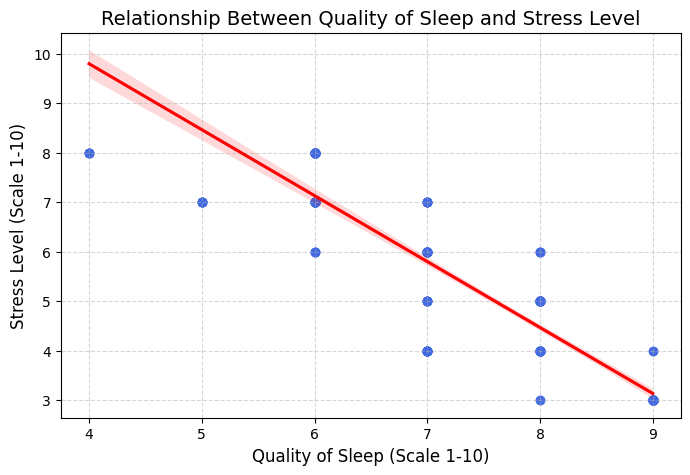

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Quality of Sleep", y="Stress Level", data=df, scatter_kws={"color": "royalblue"}, line_kws={"color": "red"})

plt.title("Relationship Between Quality of Sleep and Stress Level", fontsize=14)
plt.xlabel("Quality of Sleep (Scale 1-10)", fontsize=12)
plt.ylabel("Stress Level (Scale 1-10)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Through the above graph, we can say that when the quality of sleep increases, the stress level decreases.

## Does physical activity level impact sleep duration or quality of sleep?

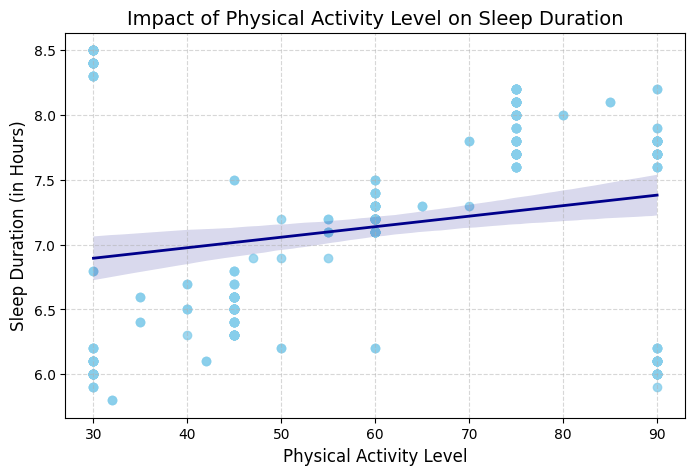

In [10]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Physical Activity Level",y="Sleep Duration",data=df,
            scatter_kws={"color": "skyblue"},line_kws={"color": "darkblue", "linewidth": 2})

plt.title("Impact of Physical Activity Level on Sleep Duration", fontsize=14)
plt.xlabel("Physical Activity Level", fontsize=12)
plt.ylabel("Sleep Duration (in Hours)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#As the level of physical activity increases, the sleep duration also increases slightly. But the relation is not strong because the spread of the dots is very high.

## How does age group affect sleep disorder prevalence?

C:\Users\DELL\AppData\Local\Temp\ipykernel_9544\3487652380.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = temp.groupby(["Age_group","Sleep Disorder"]).size().reset_index(name="Count")


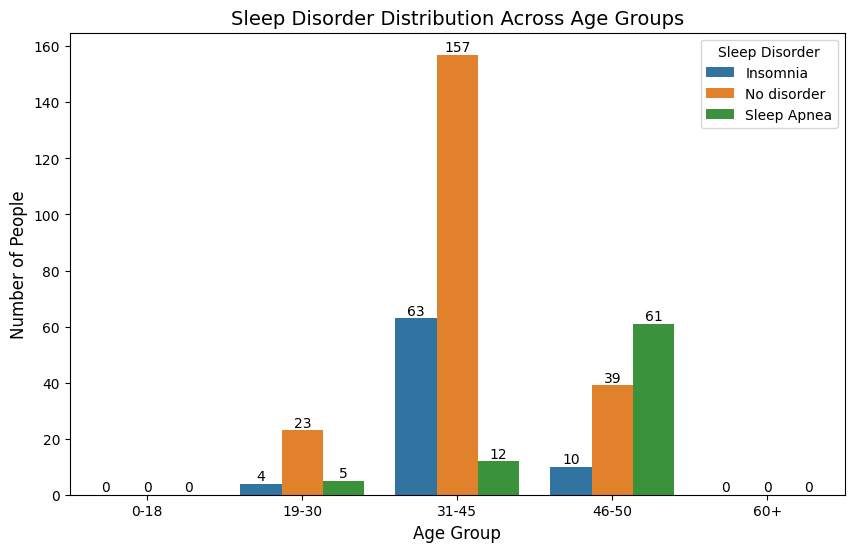

In [11]:
bins = [0,18,30,45,60,100]
labels=["0-18","19-30","31-45","46-50","60+"]
grouped = pd.cut(df["Age"], bins=bins, labels=labels)

# Create a temporary DataFrame for plotting
temp = pd.DataFrame({"Age_group":grouped,"Sleep Disorder":df["Sleep Disorder"]})

# Group and count
plot_data = temp.groupby(["Age_group","Sleep Disorder"]).size().reset_index(name="Count")

plt.figure(figsize=(10,6))
ax = sns.barplot(x="Age_group", y="Count", data=plot_data, hue="Sleep Disorder")

# Add Counting on Bars
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Sleep Disorder Distribution Across Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.show()

## Is there a gender difference in sleep duration or sleep quality?

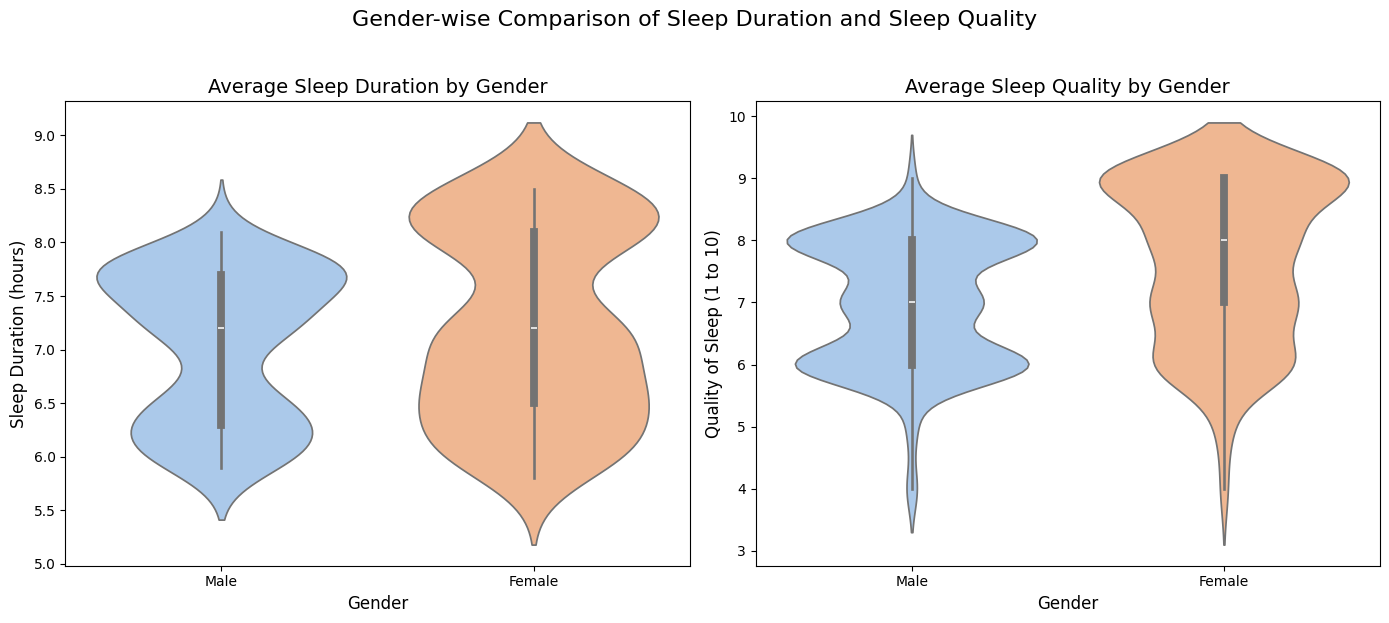

In [12]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.violinplot(ax=axes[0],x="Gender", y="Sleep Duration", data=df, palette="pastel", hue="Gender")
axes[0].set_title("Average Sleep Duration by Gender", fontsize=14)
axes[0].set_xlabel("Gender", fontsize=12)
axes[0].set_ylabel("Sleep Duration (hours)", fontsize=12)

sns.violinplot(ax=axes[1], x='Gender', y='Quality of Sleep', data=df, palette="pastel", hue="Gender")
axes[1].set_title("Average Sleep Quality by Gender", fontsize=14)
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Quality of Sleep (1 to 10)", fontsize=12)

plt.suptitle("Gender-wise Comparison of Sleep Duration and Sleep Quality", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

#Both males and females have similar median sleep durations, but females show a slightly wider range, with some individuals sleeping longer than males.

#Females generally show slightly higher sleep quality scores compared to males.

## Which occupations are associated with higher stress levels or sleep disorders?

In [13]:
# Sleep disorder count per occupation
occupation_sleep_disorder = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)
print(occupation_sleep_disorder)

Sleep Disorder        Insomnia  No disorder  Sleep Apnea
Occupation                                              
Accountant                   7           30            0
Doctor                       3           64            4
Engineer                     5           57            1
Lawyer                       2           42            3
Manager                      0            1            0
Nurse                        3            9           61
Sales Representative         0            0            2
Salesperson                 29            2            1
Scientist                    0            2            2
Software Engineer            1            3            0
Teacher                     27            9            4


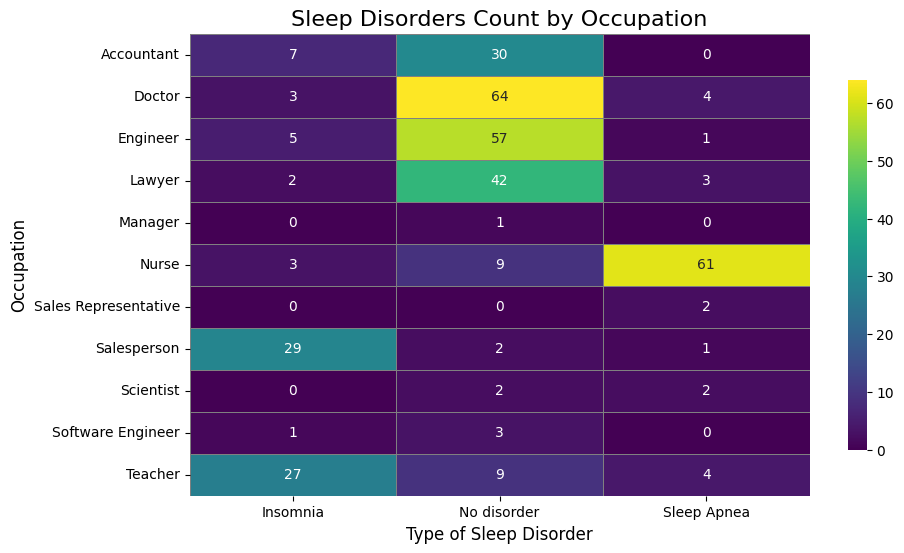

In [14]:
plt.figure(figsize=(10, 6))

sns.heatmap(occupation_sleep_disorder, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})

plt.title('Sleep Disorders Count by Occupation', fontsize=16)
plt.xlabel('Type of Sleep Disorder', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.show()

#Most nurses suffer from sleep apnea, while salespersons and teachers have a high number of insomnia cases.

## Is there any correlation between BMI Category and Sleep Disorder?

In [15]:
# create cross_tab
cross_tab = pd.crosstab(df["BMI Category"],df["Sleep Disorder"])    # use for showing corelation (for string values)
cross_tab

Sleep Disorder,Insomnia,No disorder,Sleep Apnea
BMI Category,,,
Normal,7,183,5
Normal Weight,2,17,2
Obese,4,0,6
Overweight,64,19,65


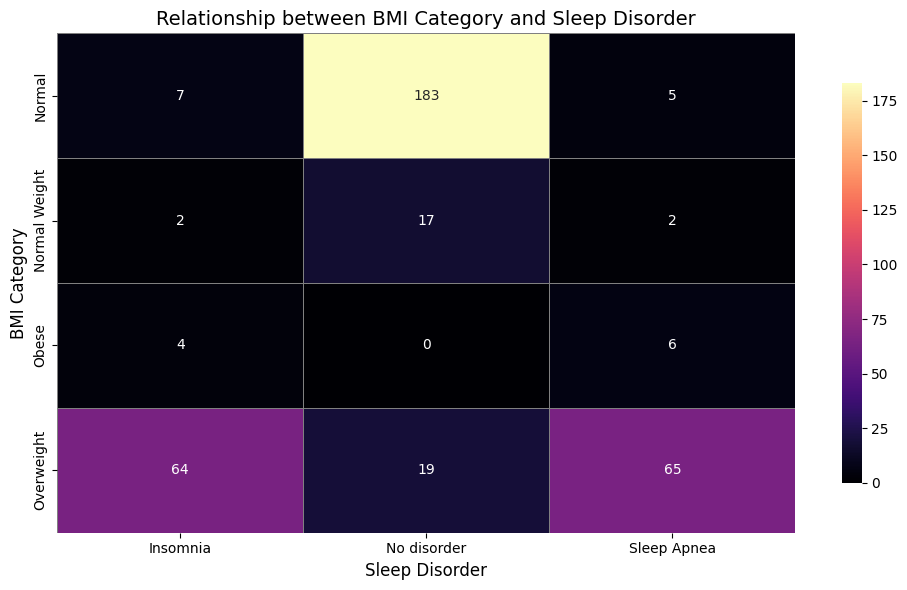

In [16]:
plt.figure(figsize=(10, 6))  

sns.heatmap(cross_tab, annot=True, fmt="d",cmap="magma",
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})   # fmt=format of values

plt.title("Relationship between BMI Category and Sleep Disorder", fontsize=14)
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("BMI Category", fontsize=12)

plt.tight_layout()
plt.show()

#Most of the individuals who are overweight suffer from sleep disorders, particularly insomnia and sleep apnea.

## Do people with higher heart rates or abnormal blood pressure tend to have lower sleep quality?

In [17]:
#Convert 'Blood Pressure' into numerical values
# Example: Split '120/80' into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df["Blood Pressure"].str.split("/", expand=True ).astype(int)

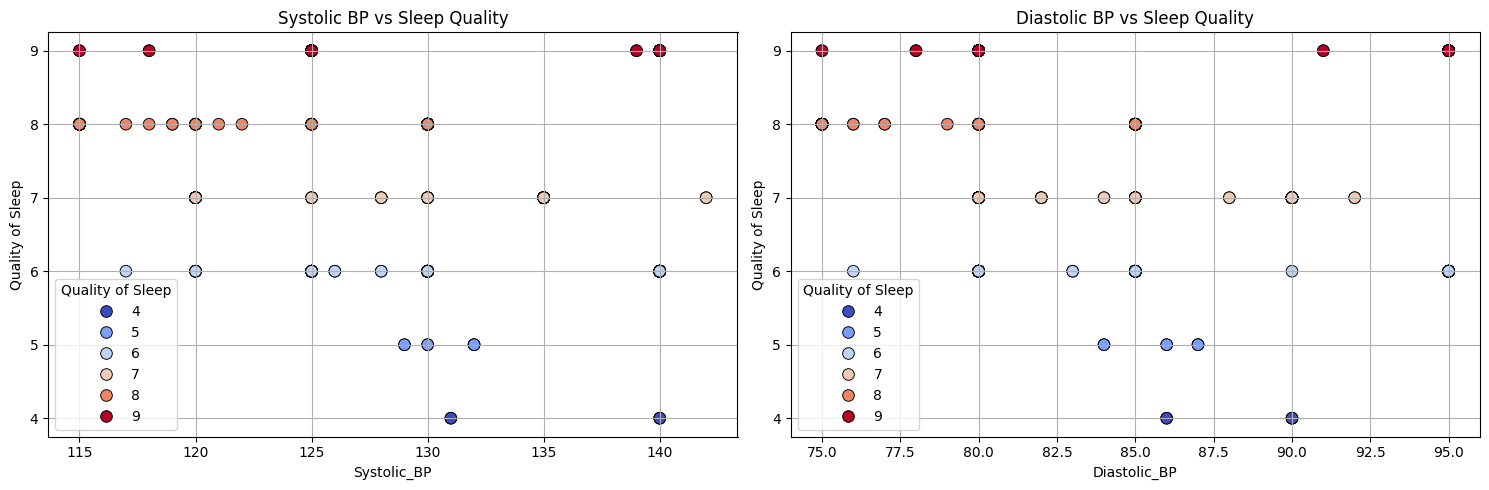

In [18]:
plt.figure(figsize=(15, 5))

# Systolic BP vs Quality of Sleep
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Systolic_BP', y='Quality of Sleep',hue='Quality of Sleep',
                palette='coolwarm', s=70, edgecolor='black')

plt.title('Systolic BP vs Sleep Quality')
plt.grid(True)


# Diastolic BP vs Quality of Sleep
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Diastolic_BP', y='Quality of Sleep',hue='Quality of Sleep',
               palette='coolwarm', s=70, edgecolor='black')

plt.title('Diastolic BP vs Sleep Quality')
plt.grid(True)

plt.tight_layout()
plt.show()

#There's no clear relationship between blood pressure and sleep quality in this dataset.

## What are the average daily steps of people with and without sleep disorders?

In [19]:
grp = df.groupby(
    (df["Sleep Disorder"] == "No disorder").map({
        True:"Wihhout Sleep Disorder", False:"With Sleep Disorder"})
)["Daily Steps"].mean()

grp

Sleep Disorder
Wihhout Sleep Disorder    6852.968037
With Sleep Disorder       6765.806452
Name: Daily Steps, dtype: float64

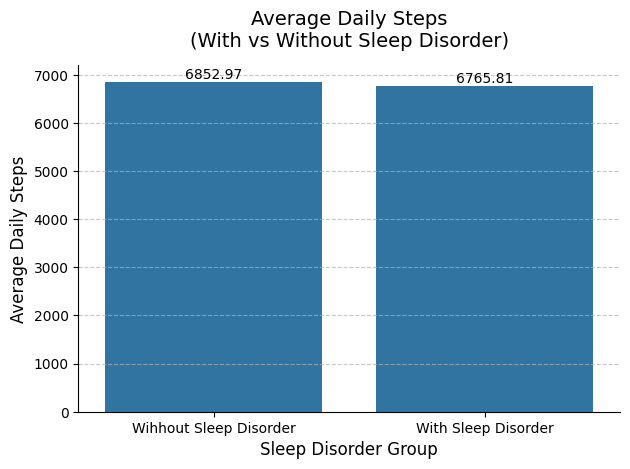

In [20]:
ax = sns.barplot(x=grp.index, y=grp.values)
ax.bar_label(ax.containers[0])

ax.set_title("Average Daily Steps\n(With vs Without Sleep Disorder)", fontsize=14, y=1.03)
ax.set_xlabel("Sleep Disorder Group", fontsize=12)
ax.set_ylabel("Average Daily Steps", fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right border for clean look
sns.despine()

plt.tight_layout()
plt.show()

## Build a correlation heatmap of all numerical variables.

In [25]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [26]:
df["Sleep_Disorder_Binary"] = df["Sleep Disorder"].apply(lambda x: 0 if x=="No disorder" else 1)

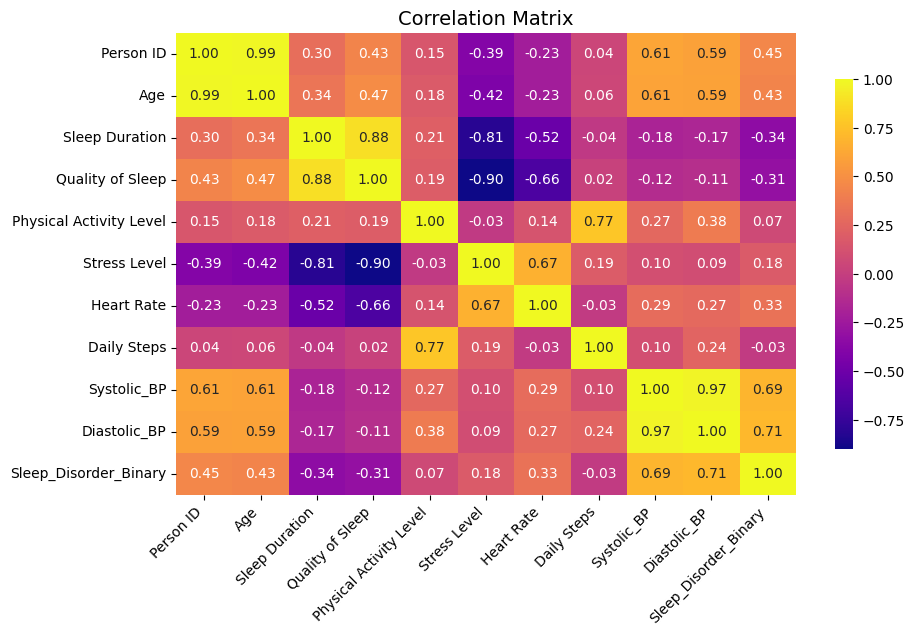

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='plasma',fmt=".2f", cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.show()

## Create a dashboard-like visualization with multiple subplots

C:\Users\DELL\AppData\Local\Temp\ipykernel_9544\3120185437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Quality of Sleep', palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9544\3120185437.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sleep Disorder', y='Heart Rate', palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9544\3120185437.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Stress Level', y='Sleep Duration', palette='cool')


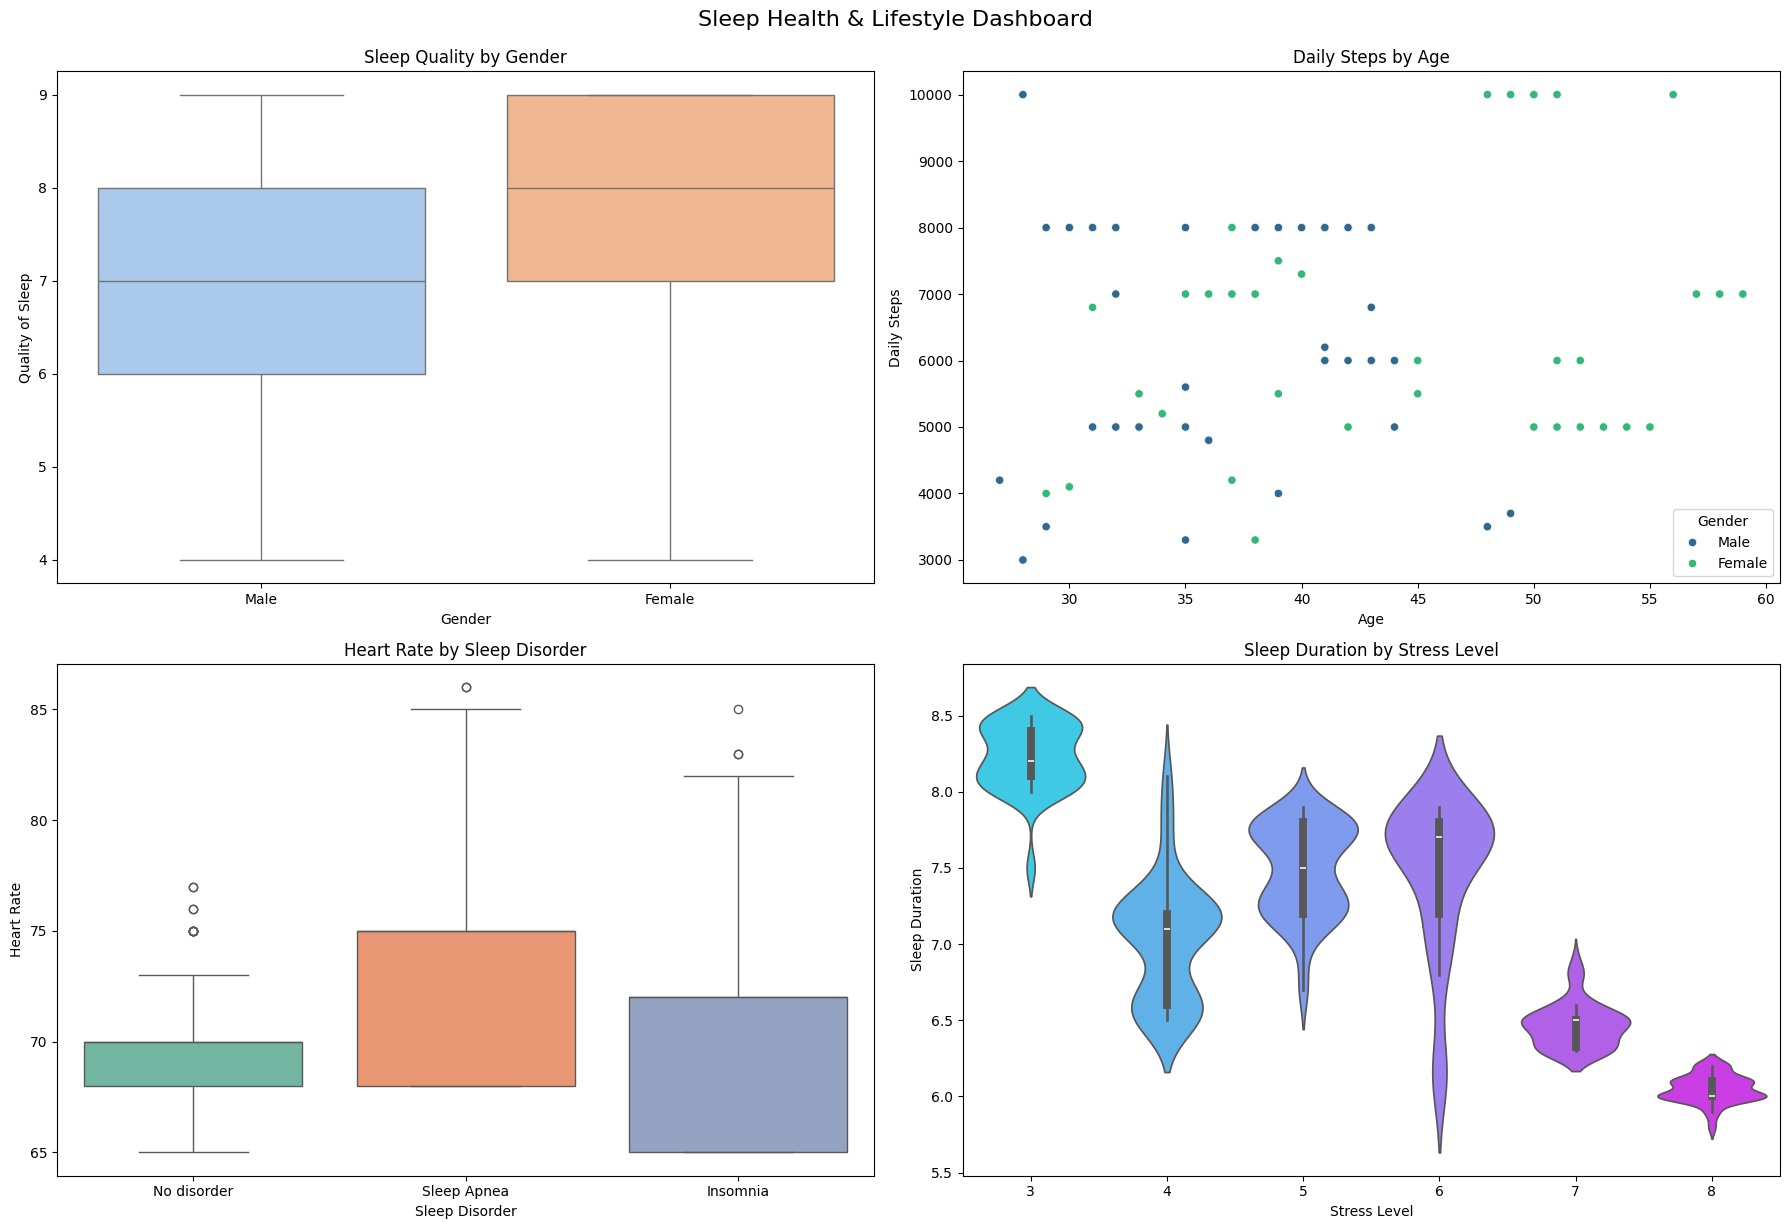

In [34]:
plt.figure(figsize=(18, 12))  

#Sleep Quality by Gender
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Gender', y='Quality of Sleep', palette='pastel')
plt.title('Sleep Quality by Gender')

#Daily Steps by Age
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='Daily Steps', hue='Gender', palette='viridis')
plt.title('Daily Steps by Age')
plt.legend(title='Gender')

#Heart Rate by Sleep Disorder
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Sleep Disorder', y='Heart Rate', palette='Set2')
plt.title('Heart Rate by Sleep Disorder')

#Stress Level vs Sleep Duration
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Stress Level', y='Sleep Duration', palette='cool')
plt.title('Sleep Duration by Stress Level')


plt.tight_layout()
plt.suptitle('Sleep Health & Lifestyle Dashboard', fontsize=16, y=1.02)
plt.show()
